## Import libraries and load data

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clients = pd.read_csv('../data/df_final_demo.txt')
events_1 = pd.read_csv('../data/df_final_web_data_pt_1.txt')
events_2 = pd.read_csv('../data/df_final_web_data_pt_2.txt')
test = pd.read_csv('../data/df_final_experiment_clients.txt')

## Client data

### dataframe exploration

In [45]:
clients.info()

# there are some null values. 
# The dypes look correct: client_id and gender are categorical. 

<class 'pandas.core.frame.DataFrame'>
Index: 70594 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  float64
 2   clnt_tenure_mnth  70594 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  float64
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  float64
 8   logons_6_mnth     70594 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


In [40]:
clients.isnull().sum().sort_values(ascending = False)
clients[clients.clnt_age.isna()]

# it seems like there are 14 rows with lots of null values and 1 row where the age is missing. 
# This is an insignificant amount of data (having >70000 valid data points) 
# We can savely remove these data. 

clients.dropna(inplace=True)

clnt_age            15
num_accts           14
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
calls_6_mnth        14
bal                 14
logons_6_mnth       14
client_id            0
dtype: int64

In [ ]:
# look for duplicates
clients.duplicated().sum()

# there are no duplicated values. 

In [46]:
# Let's classify numerical vs categorial columns. 

clients_num = list(clients.select_dtypes("number").columns)
clients_num.remove('client_id')
clients_cat = ['client_id', 'gendr']

len(clients.columns) == len (clients_num + clients_cat)


True

In [10]:
clients.sample(10)

# many numerical columns look like int but have type float

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
53144,2830632,9.0,118.0,28.0,F,2.0,65170.51,1.0,1.0
42059,6219579,26.0,321.0,31.5,M,2.0,36155.70,0.0,3.0
55165,4647846,5.0,60.0,29.5,F,3.0,32564.36,3.0,3.0
8634,3244142,13.0,166.0,55.5,F,2.0,141413.67,6.0,9.0
5366,869520,21.0,263.0,65.5,M,4.0,1260593.42,2.0,5.0
50596,8735075,24.0,289.0,63.0,F,2.0,92179.56,2.0,3.0
7886,6568477,13.0,158.0,53.5,M,2.0,193436.93,2.0,5.0
40504,2849792,7.0,95.0,49.0,U,2.0,69796.12,6.0,9.0
3702,125305,11.0,143.0,33.5,M,2.0,74182.77,6.0,9.0
46419,6384526,6.0,82.0,70.0,U,2.0,44877.92,6.0,9.0


### variables exploration

In [47]:
clients.clnt_tenure_yr.value_counts

#convert to int
clients.clnt_tenure_yr = clients.clnt_tenure_yr.astype("int")

np.int64(0)

/var/folders/yf/ydfr37g56sb7b4mncpm76gk00000gn/T/ipykernel_26871/3203938801.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Params")


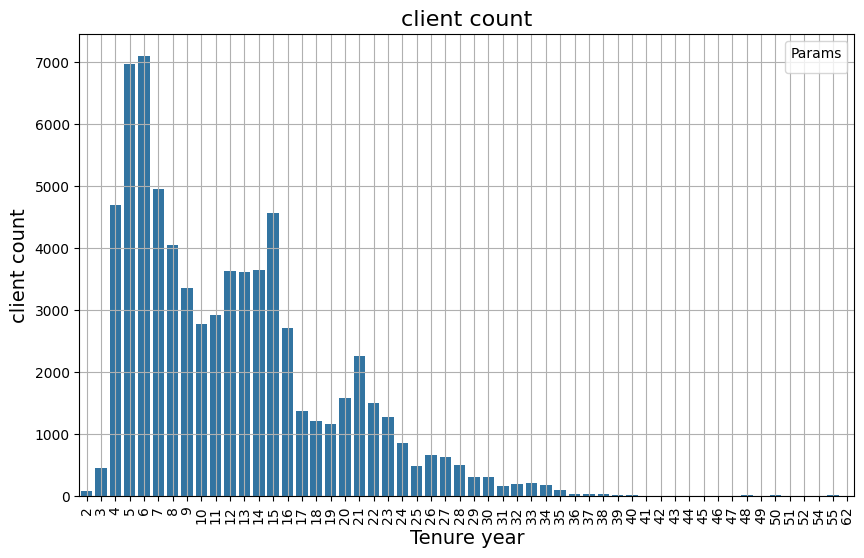

In [60]:

tenure_yr_count = clients.clnt_tenure_yr.value_counts()

plt.figure(figsize=(10,6))
    
sns.barplot(x = tenure_yr_count.index, y = tenure_yr_count.values)
    
# Configurar la gráfica
plt.title(f'client count', fontsize=16)
plt.xlabel('Tenure year', fontsize=14)
plt.ylabel(f'client count', fontsize=14)
plt.legend(title="Params")
plt.grid(True)
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()
